In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy

In [2]:
def vocabulary_size(data, column="Cognate_Set"):
    """Count different words in vocabulary."""
    return len(set(data[column]))

In [3]:
def semantic_width(data, column="Cognate_Set"):
    """Calculate average synonym count.

    Calculate the average weighted semantic width in the language
    represented by data.

    """
    width = 0
    m = 0
    for form, meanings in data.groupby(column):
        width += meanings["Weight"].sum()**2/(meanings["Weight"]**2).sum()
        m += 1
    return width/m

In [4]:
def synonymity(data):
    """Calculate average synonym count.

    Calculate the average weighted synonym count in the language
    represented by data.

    """
    return semantic_width(data, column="Feature_ID")

In [5]:
try:
    clics_words = pandas.read_csv("words.csv")
except FileNotFoundError:
    import urllib.request
    data = urllib.request.urlopen(
        "https://github.com/clics/clics-data/blob/master/data/words.csv?raw=true")
    clics_words = pandas.read_csv(data)

clics_words["Weight"] = 1

clics_vocabulary = []
clics_semantic_width = []
clics_synonymity = []
for language, words in clics_words.groupby("LanguageId"):
    clics_vocabulary.append(vocabulary_size(words, "ClicsValue"))
    clics_semantic_width.append(semantic_width(words, "ClicsValue"))
    clics_synonymity.append(semantic_width(words, "ConcepticonGloss"))

In [6]:
path = "../robustness"


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Clics: nan±nan


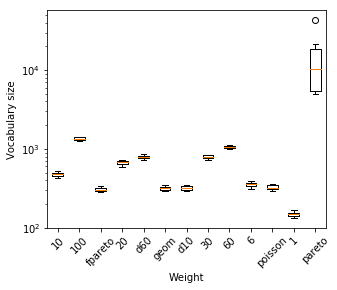

In [14]:
import os
n = {}
for file in os.listdir(path):
    if file.startswith("trivial_long") and file.endswith(".tsv") and "_i" in file and "_n" not in file:
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        weight = file[file.find("_i")+2:].split(".")[0]
        for language_id, language_data in all_data.groupby("Language_ID"):
            if int(language_id) > 10**6:
                n.setdefault(weight, []).append(vocabulary_size(language_data))

plt.boxplot(list(n.values()), labels=list(n.keys()))

plt.xlabel("Weight")
plt.ylabel("Vocabulary size")
print("Clics: {:0.1f}±{:0.1f}".format(
    numpy.mean(clics_vocabulary), numpy.std(clics_vocabulary)))
plt.gcf().set_size_inches(5,4)
plt.gca().set_yscale('log')
plt.xticks(rotation=45)
plt.savefig("lexicon_size_starting_weight.pdf")


In [18]:
numpy.mean(n["100"])


1342.6666666666667

Clics: nan±nan


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


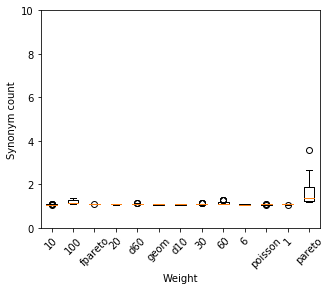

Clics: nan±nan


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


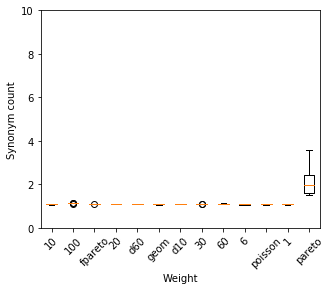

In [11]:
import os
n = {}
for file in os.listdir(path):
    if file.startswith("trivial_long") and file.endswith(".tsv") and "_i" in file and "_n" not in file:
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        weight = file[file.find("_i")+2:].split(".")[0]
        for language_id, language_data in all_data.groupby("Language_ID"):
            if int(language_id) > 10**6:
                n.setdefault(weight, []).append(synonymity(language_data))

plt.boxplot(list(n.values()), labels=list(n.keys()))

plt.xlabel("Weight")
plt.ylabel("Synonym count")
print("Clics: {:0.1f}±{:0.1f}".format(
    numpy.mean(clics_synonymity), numpy.std(clics_synonymity)))
plt.gcf().set_size_inches(5,4)
plt.ylim(0, 10)
plt.xticks(rotation=45)
plt.savefig("synonymity_size_starting_weight.pdf")


Clics: nan±nan


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


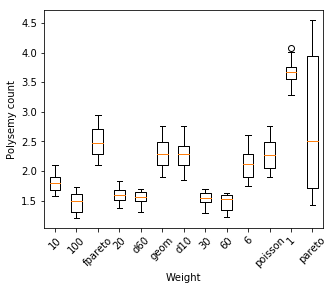

Clics: nan±nan


/usr/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:105: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/lib/python3.6/site-packages/numpy/core/_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


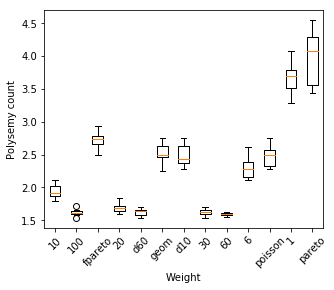

In [12]:
import os
n = {}
for file in os.listdir(path):
    if file.startswith("trivial_long") and file.endswith(".tsv") and "_i" in file and "_n" not in file:
        all_data = pandas.read_csv(
            os.path.join(path, file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        weight = file[file.find("_i")+2:].split(".")[0]
        for language_id, language_data in all_data.groupby("Language_ID"):
            if int(language_id) > 10**6:
                n.setdefault(weight, []).append(semantic_width(language_data))

plt.boxplot(list(n.values()), labels=list(n.keys()))

plt.xlabel("Weight")
plt.ylabel("Polysemy count")
print("Clics: {:0.1f}±{:0.1f}".format(
    numpy.mean(clics_semantic_width), numpy.std(clics_semantic_width)))
plt.gcf().set_size_inches(5,4)
plt.xticks(rotation=45)
plt.savefig("polysemy_size_starting_weight.pdf")
